# Using SQL in Pandas

Package for anaconda prompt :- conda install -c anaconda pandasql

Then we import the important packages

In [1]:
#Getting all the packages we need: 
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #statistics graph package
import matplotlib.pyplot as plt #plot package
import pandasql as ps #sql package
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords

In [2]:
df = pd.read_csv('r_dataisbeautiful_posts.csv')
df.sample(10)

C:\Users\91960\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
125387,5l7nam,Number of celebrity deaths from 2006 to 2016 [OC],27,Baldemoto,NaN,NaN,NaN,NaN,1483154590,https://www.reddit.com/r/dataisbeautiful/comme...,13,False
167153,2oteq9,Alcohol consumption vs suicide rate,4,3dsmax23,NaN,NaN,NaN,NaN,1418174420,https://www.reddit.com/r/dataisbeautiful/comme...,8,False
168938,2m06g4,The World's largest Cash Crops.,1,[deleted],NaN,NaN,NaN,NaN,1415740782,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
157781,3kwiue,"Australia's political rollercoaster: 13 years,...",97,trtryt,NaN,NaN,NaN,NaN,1442234358,https://www.reddit.com/r/dataisbeautiful/comme...,8,False
32843,fwqje6,Death Probability By Age 0-100 | Probability C...,1,mechanikwlo,NaN,moderator,0.0,[],1586286563,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
84616,9116v4,Closest MLB Park by Driving Time,0,Jayhawk_Dunk,NaN,NaN,NaN,NaN,1532294696,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
13432,ik0km9,[OC] A year ago I was hospitalized for a faile...,1,ryfry314,OC: 1,NaN,0.0,[],1598889325,https://www.reddit.com/r/dataisbeautiful/comme...,1470,False
49646,e20czt,The Fraction of US Wealth by Generation and year,1,bene20080,NaN,NaN,0.0,[],1574785898,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
49175,e52p9f,So it begins...,1,Uniquefishtrail,NaN,NaN,0.0,[],1575309397,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
183729,1q3n70,Global healthcare spending vs life expectancy,79,victor47,NaN,NaN,NaN,NaN,1383833452,https://www.reddit.com/r/dataisbeautiful/comme...,12,False


In [3]:
df.tail()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
190848,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,NaN,NaN,NaN,NaN,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
190849,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,NaN,NaN,NaN,NaN,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
190850,pq922,Wavii.,13,ddshroom,NaN,NaN,NaN,NaN,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
190851,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,NaN,NaN,NaN,NaN,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
190852,ppvl7,A map showing the geographical distribution of...,45,zanycaswell,NaN,NaN,NaN,NaN,1329263456,https://www.reddit.com/r/dataisbeautiful/comme...,5,False


In [4]:
print("Data shape :",df.shape)

Data shape : (190853, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190853 entries, 0 to 190852
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     190853 non-null  object 
 1   title                  190852 non-null  object 
 2   score                  190853 non-null  int64  
 3   author                 190853 non-null  object 
 4   author_flair_text      28845 non-null   object 
 5   removed_by             20744 non-null   object 
 6   total_awards_received  65146 non-null   float64
 7   awarders               54478 non-null   object 
 8   created_utc            190853 non-null  int64  
 9   full_link              190853 non-null  object 
 10  num_comments           190853 non-null  int64  
 11  over_18                190853 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 16.2+ MB


### We now know that the DataFrame we’re working with has 12 columns with the data classes boolean, float, integer, and Python object

In [6]:
#Empty values:
df.isnull().sum().sort_values(ascending = False)

removed_by               170109
author_flair_text        162008
awarders                 136375
total_awards_received    125707
title                         1
id                            0
score                         0
author                        0
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

# Running SQL in Pandas

In [7]:
q1 = """SELECT removed_by, count(distinct id) as number_of_removed_posts
FROM df 
where removed_by is not null 
group by removed_by 
order by 2 desc """
grouped_df = ps.sqldf(q1, locals())
grouped_df

,removed_by,number_of_removed_posts
0,moderator,14789
1,deleted,2948
2,automod_filtered,1553
3,reddit,1453
4,author,1


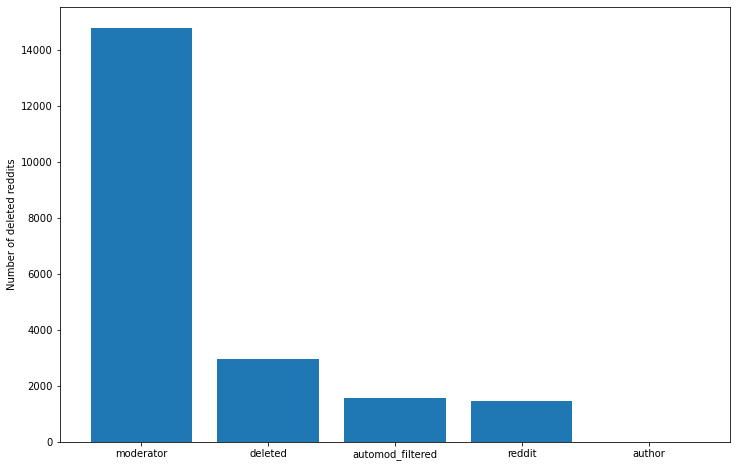

In [8]:
#Visualizing bar chart based of SQL output:
removed_by = grouped_df['removed_by'].tolist()
number_of_removed_posts = grouped_df['number_of_removed_posts'].tolist()
plt.figure(figsize=(12,8))
plt.ylabel("Number of deleted reddits")
plt.bar(removed_by, number_of_removed_posts)
plt.show()

The majority of deleted posts (68%) were removed by a moderator, as can be seen. Authors remove less than 1% of the content.

**Who are the top three users whose posts have been removed the most by moderators?**

In [9]:
q2 = """SELECT author, COUNT(id) as no_of_removed_posts 
FROM df 
where removed_by = 'moderator' 
group by author
order by 2 desc 
limit 3"""
grouped2_df = ps.sqldf(q2,locals())
grouped2_df

,author,no_of_removed_posts
0,hornedviper9,71
1,peter_mladenov,35
2,ad55mul1994,20


Hornedviper is not a good user.

**Let’s see how many posts with the keyword “virus” are removed by the moderator.**

In [10]:
#Step 1: Getting proportion of all removed posts / removed "virus" posts
q3 = """
with Virus as (
SELECT id 
FROM df 
where removed_by = 'moderator' 
and title like '%virus%'
)
SELECT count(v.id) as virus_removed, count(d.id) as all_removed
FROM df d 
left join virus v on v.id = d.id 
where d.removed_by = 'moderator';"""
removed_moderator_df = ps.sqldf(q3, locals())
#print(type(removed_moderator_df))
print(removed_moderator_df.values)
print(removed_moderator_df.values[0])

[[ 1056 14789]]
[ 1056 14789]


In [11]:
#Step 2: getting % virus reddits from all removed posts:
virus_removed_id = removed_moderator_df.values[0][0]
all_removed_id = removed_moderator_df.values[0][1]
print(virus_removed_id/all_removed_id)

0.07140442220569342


In [12]:
#Top 10 reddits with the most number of comments:
q4 = """SELECT title, num_comments as number_of_comments 
FROM df  
where title != 'data_irl'
order by 2 desc 
limit 10"""
print(ps.sqldf(q4, locals()))

                                               title  number_of_comments
0  The best (&amp; worst) countries for raising a...               12508
1            Police killing rates in G7 members [OC]               10425
2  [oc] How taboo and popular are sexual fetishes...               10396
3  Worst Episode Ever? The Most Commonly Rated Sh...                9217
4  The environmental impact of Beyond Meat and a ...                9120
5               What's getting cut in Trump's budget                8768
6      [OC] Mississippi, the Poorest State in the US                8703
7  [OC] Trump voters are less likely to have a co...                8354
8  [OC] Trending Google Searches by State Between...                8270
9  Almost all men are stronger than almost all wo...                7538


**The most frequently used words**

In [13]:
#To build a wordcloud, we have to remove NULL values first:
df["title"] = df["title"].fillna(value="")

In [14]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['title'].str.lower())
#word_string

(-0.5, 1599.5, 799.5, -0.5)

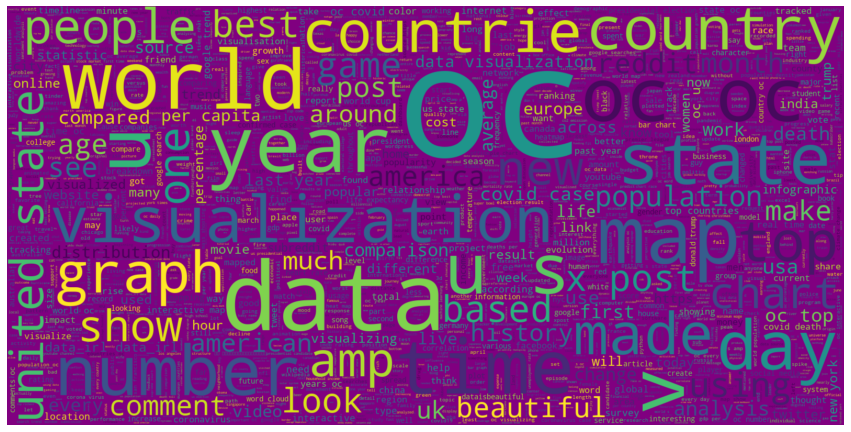

In [18]:
#And - plotting:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

**Comments distribution**

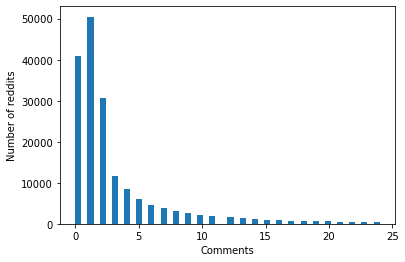

In [27]:
#Comments distribution plot:
fig, ax = plt.subplots()
C = sns.distplot(df[df["num_comments"] < 25]["num_comments"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
C = ax.set(xlabel="num_comments", ylabel="id")
plt.ylabel("Number of reddits")
plt.xlabel("Comments")
plt.show()

## Correlation between dataset variables

Let’s look at how the dataset variables are related to one another now:
1. What is the relationship between the score and the comments?
2. Do they rise and fall in lockstep (positive correlation)?
3. Is there a positive correlation between them when one increases and the other decreases, and vice versa (negative correlation)? Or do they have nothing to do with each other?

Correlation is expressed as a number between -1 and +1, with +1 indicating the highest positive correlation, -1 indicating the highest negative correlation, and 0 indicating no correlation.

In [21]:
df.corr()

,score,total_awards_received,created_utc,num_comments,over_18
score,1.000000,0.330506,0.005262,0.574893,0.015676
total_awards_received,0.330506,1.000000,0.027446,0.168387,0.001456
created_utc,0.005262,0.027446,1.000000,0.029795,0.014476
num_comments,0.574893,0.168387,0.029795,1.000000,0.022924
over_18,0.015676,0.001456,0.014476,0.022924,1.000000


With a correlation value of 0.6, we can see that score and number of comments are highly positively correlated.
There is a 0.2 correlation between total awards received, score (0.2), and the number of comments (num comments) (0.1).

Let’s use a heatmap to visualize the correlation table above.

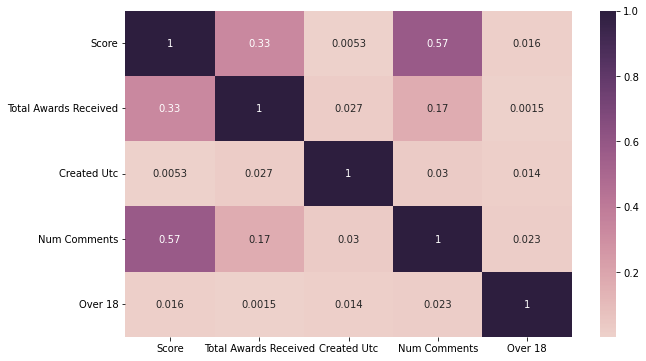

In [26]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]
fig, ax = plt.subplots(figsize=(10,6))
D = sns.heatmap(df.corr(), annot=True, 
                xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

**Score distribution**

In [23]:
df.score.describe()

count    190853.000000
mean        176.016159
std        1951.936524
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max      116226.000000
Name: score, dtype: float64

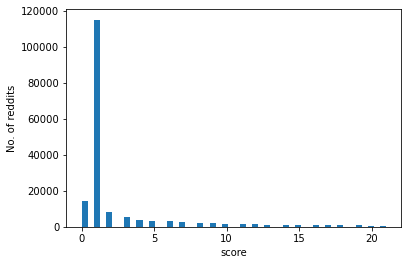

In [25]:
#Score distribution: 
fig, ax = plt.subplots()
G = sns.distplot(df[df["score"] < 22]["score"], kde=False, hist_kws={'alpha': 1}, ax=ax)
G = ax.set(xlabel="score", ylabel="No. of reddits")

Generally there is score of 1 in most posts.